<a href="https://colab.research.google.com/github/PhamAnhKiet20146220/AI-T7-tiet_1234/blob/main/noi_com_dien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


48.365019011406844


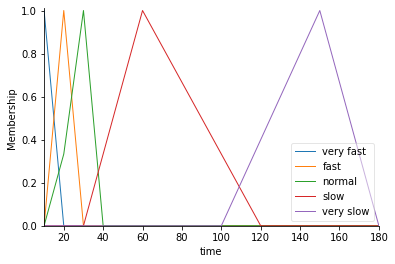

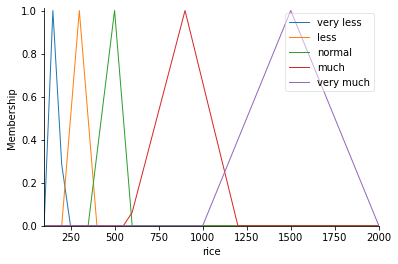

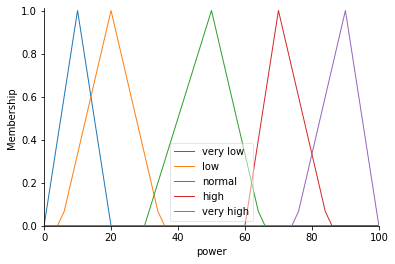

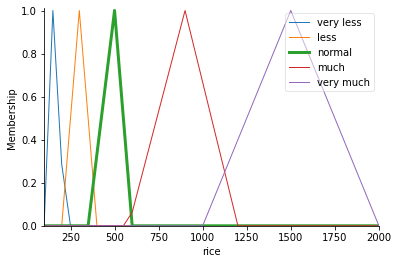

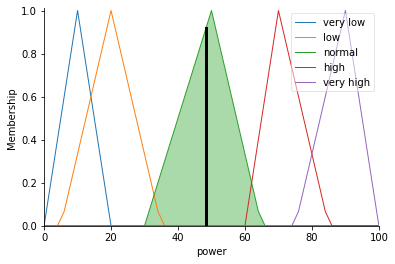

In [30]:
import numpy as np
import skfuzzy as fuzz
from  skfuzzy import control as ctrl

time = ctrl.Antecedent(np.arange(10,181,10),'time')
rice = ctrl.Antecedent(np.arange(100,2001,50),'rice')
power = ctrl.Consequent(np.arange(0,101,2),'power')

time['very fast']=fuzz.trimf(time.universe,[5,10,20])
time['fast']=fuzz.trimf(time.universe,[10,20,25])
time['normal']=fuzz.trimf(time.universe,[15,30,40])
time['slow']=fuzz.trimf(time.universe,[30,60,120])
time['very slow']=fuzz.trimf(time.universe,[100,150,180])

rice['very less']=fuzz.trimf(rice.universe,[100,150,220])
rice['less']=fuzz.trimf(rice.universe,[200,300,400])
rice['normal']=fuzz.trimf(rice.universe,[350,500,600])
rice['much']=fuzz.trimf(rice.universe,[580,900,1200])
rice['very much']=fuzz.trimf(rice.universe,[1000,1500,2000])

power['very low']=fuzz.trimf(power.universe,[0,10,20])
power['low']=fuzz.trimf(power.universe,[5,20,35])
power['normal']=fuzz.trimf(power.universe,[30,50,65])
power['high']=fuzz.trimf(power.universe,[60,70,85])
power['very high']=fuzz.trimf(power.universe,[75,90,100])

time.view()
rice.view()
power.view()
rice['normal'].view()

rule1=ctrl.Rule(time['very fast'] & rice['very less'], power['very low'])
rule2=ctrl.Rule(time['very fast'] & rice['less'], power['low'])
rule3=ctrl.Rule(time['very fast'] & rice['normal'], power['low'])
rule4=ctrl.Rule(time['very fast'] & rice['much'], power['normal'])
rule5=ctrl.Rule(time['very fast'] & rice['very much'], power['high'])

rule6=ctrl.Rule(time['fast'] & rice['very less'], power['low'])
rule7=ctrl.Rule(time['fast'] & rice['less'], power['low'])
rule8=ctrl.Rule(time['fast'] & rice['normal'], power['normal'])
rule9=ctrl.Rule(time['fast'] & rice['much'], power['high'])
rule10=ctrl.Rule(time['fast'] & rice['very much'], power['very high'])

rule11=ctrl.Rule(time['normal'] & rice['very less'], power['normal'])
rule12=ctrl.Rule(time['normal'] & rice['less'], power['normal'])
rule13=ctrl.Rule(time['normal'] & rice['normal'], power['normal'])
rule14=ctrl.Rule(time['normal'] & rice['much'], power['high'])
rule15=ctrl.Rule(time['normal'] & rice['very much'], power['very high'])

rule16=ctrl.Rule(time['slow'] & rice['very less'], power['high'])
rule17=ctrl.Rule(time['slow'] & rice['less'], power['high'])
rule18=ctrl.Rule(time['slow'] & rice['normal'], power['high'])
rule19=ctrl.Rule(time['slow'] & rice['much'], power['high'])
rule20=ctrl.Rule(time['slow'] & rice['very much'], power['very high'])

rule21=ctrl.Rule(time['very slow'] & rice['very less'], power['high'])
rule22=ctrl.Rule(time['very slow'] & rice['less'], power['high'])
rule23=ctrl.Rule(time['very slow'] & rice['normal'], power['very high'])
rule24=ctrl.Rule(time['very slow'] & rice['much'], power['very high'])
rule25=ctrl.Rule(time['very slow'] & rice['very much'], power['very high'])

powerconsumption_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powerconsumption = ctrl.ControlSystemSimulation(powerconsumption_ctrl)
powerconsumption.input['time']=30
powerconsumption.input['rice'] = 500
powerconsumption.compute()
print(powerconsumption.output['power'])
power.view(sim=powerconsumption)









